<a href="https://colab.research.google.com/github/SmartDogy/ProjectZoo-/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input, Flatten

from sklearn.metrics import accuracy_score

from PIL import Image

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


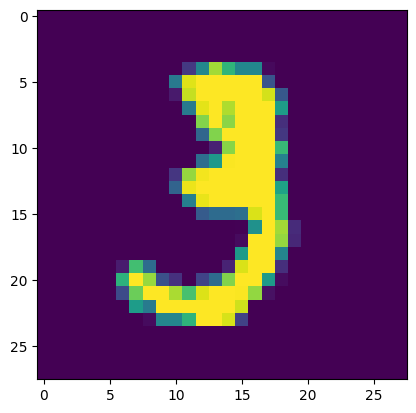

In [ ]:
plt.imshow(x_train[10])

In [ ]:
x_train[0].max()

np.uint8(255)

In [ ]:
# We want the input to be between 0 and 1 that why we divide it with 255 which is highest number

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=(28, 28)))
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu')) #input layer
model.add(Dense(20, activation='relu')) #hidden layer 1
model.add(Dense(10, activation='relu')) # hidden layer 2
model.add(Dense(10, activation='relu')) # hidden layer 3
model.add(Dense(10, activation='softmax')) #output layer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,490 (404.26 KB)

 Trainable params: 103,490 (404.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'Adam', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6929 - loss: 0.9165 - val_accuracy: 0.9481 - val_loss: 0.1771
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9571 - loss: 0.1564 - val_accuracy: 0.9592 - val_loss: 0.1357
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9721 - loss: 0.0981 - val_accuracy: 0.9641 - val_loss: 0.1260
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9783 - loss: 0.0736 - val_accuracy: 0.9697 - val_loss: 0.1037
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9835 - loss: 0.0539 - val_accuracy: 0.9691 - val_loss: 0.1064
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9859 - loss: 0.0457 - val_accuracy: 0.9690 - val_loss: 0.1213
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9698 - val_loss: 0.1131
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0292

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred = pred.argmax(axis=1)

In [ ]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
accuracy_score(y_test, pred)

0.9752

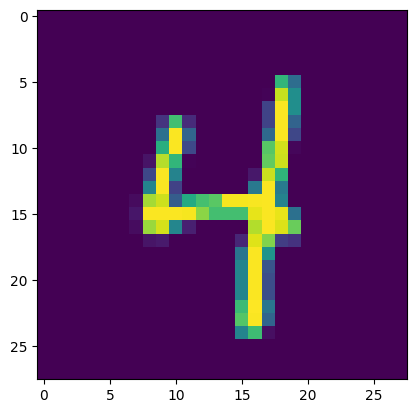

In [ ]:
plt.imshow(x_test[19])

In [ ]:
pred = model.predict(x_test[19].reshape(1, 28, 28))

pred = pred.argmax(axis = 1)

print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[4]
